
<h1>
<center></center>
</h1>

<h1>
<center>CFRM 421/521, Spring 2023</center>
</h1>

<h1>
<center>Eric Lee, Ian Lee</center>
</h1>

<h1>
<center>Final Project - Gold Price Prediction</center>
</h1>

## **Introduction**

**Project Propose**

The project aims to predict gold prices using time series data related to gold. Gold prices play an important role in the global economy, as gold is widely used in the technology field and, most importantly, is considered a store of value. We are interested in how we can use machine learning to predict its price and potentially create a trading strategy. This involves analyzing historical gold price movements and other related economic indicators to build a model that forecasts future prices.

**Method**

In this project, we use different machine learning algorithms to predict gold prices. We separate it into two parts: the first part involves using regression models to directly predict gold prices. In the second part, we use neural networks to predict both the price and the movement of gold prices. The following is group menbers' contribution to this project:

*   Regressors (Ian Lee)
    * Random Forest Regressor
    * Linear Regressor
*   Neural Networks (Eric Lee)
    * Long Short Term Memory


**Data Source**

Our data source is Yahoo Finance. We download, organize, and convert the data into a CSV file. We considered various factors that could influence gold prices. For example, DX-Y.NYB, which is the USD index, shows that gold often acts as a store of value. This means that when the USD loses value, gold prices typically rise. We also included major stock markets, such as those in the US, EU, Japan, and China, as they can potentially impact gold prices. Additionally, we selected gold-correlated commodities like silver and platinum. The VIX, a volatility index, is included because we believe higher volatility may drive more investors to buy gold, while lower volatility may result in fewer investors purchasing gold. Finally, we included the 10-year treasury bond as a risk-free indicator, which is an important measure of the global economy.

In [ ]:
import yfinance as yf
import pandas as pd

# Define the list of tickers including gold
lst = ["GOLD", "^GSPC", "^DJI", "^VIX", "^FTSE", "000001.SS", "^N225", "DX-Y.NYB", "SI=F", "PL=F", "CL=F", "^TNX"]

# Dictionary to hold data
close_price = {}

# Fetch data for all tickers
for ticker in lst:
    data = yf.download(ticker, start="2000-12-01", end="2024-05-20")
    close_price[ticker] = data['Close']

# Create DataFrame
df = pd.DataFrame(close_price)

# Filter the DataFrame to only include rows where 'GOLD' is not NaN
df = df[df['GOLD'].notna()]
# This step is actually redundant if you interpolate all missing GOLD data unless you want to remove days with no original gold data at all
df = df.dropna(subset=['GOLD'])
# Save the DataFrame to an Excel file
df.to_excel("gold_based_data_test.xlsx")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df = pd.read_excel("gold_based_data_test.xlsx")
lst.append("Date")
temp = {}
# Fill the missing value by linear way
for ticker in lst:
    temp[ticker] = df[ticker].interpolate(method='linear')
new_df = pd.DataFrame(temp)
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%Y-%m-%d')
new_df.set_index('Date', inplace=True)
# Save the filled DataFrame to both an excecl file and a csv file.
new_df.to_excel("temp.xlsx")
new_df.to_csv("temp.csv")

## **Regressors (Ian Lee)**

In [ ]:
#Import data
import pandas as pd
data = pd.read_csv("temp.csv")
data

,Date,GOLD,^GSPC,^DJI,^VIX,^FTSE,000001.SS,^N225,DX-Y.NYB,SI=F,PL=F,CL=F,^TNX
0,2000-12-01,15.312500,1315.229980,10373.540039,27.480000,6170.399902,2081.843018,14835.330078,114.730003,4.640000,612.000000,32.049999,5.513
1,2000-12-04,15.690000,1324.969971,10560.950195,27.780001,6158.700195,2092.138916,14954.730469,113.709999,4.714000,622.099976,31.299999,5.522
2,2000-12-05,14.910000,1376.540039,10898.719727,24.990000,6299.000000,2091.669922,14695.049805,114.470001,4.704000,607.400024,29.549999,5.430
3,2000-12-06,15.840000,1351.459961,10664.379883,25.070000,6273.299805,2075.626953,14889.370117,113.309998,4.754000,605.400024,29.850000,5.319
4,2000-12-07,16.260000,1343.550049,10617.360352,25.340000,6231.399902,2075.043945,14720.360352,113.540001,4.724000,612.599976,29.360001,5.299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,2024-05-13,16.940001,5221.419922,39431.511719,13.600000,8415.000000,3148.020996,38179.460938,105.220001,28.221001,1005.299988,79.120003,4.481
5897,2024-05-14,17.150000,5246.680176,39558.109375,13.420000,8428.099609,3145.773926,38356.058594,105.010002,28.485001,1039.300049,78.019997,4.445
5898,2024-05-15,17.420000,5308.149902,39908.000000,12.450000,8445.799805,3119.902100,38385.730469,104.349998,29.514000,1063.300049,78.629997,4.356
5899,2024-05-16,17.520000,5297.100098,39869.378906,12.420000,8438.700195,3122.400879,38920.261719,104.459999,29.665001,1065.400024,79.230003,4.377


**Random Forest Regressor**


In this part, we use the random forest regressor to evaluate if the model provides better predictions than a simple prediction method. On the test set, we compute the RMSE of a model that predicts the 1-step ahead value of
$GOLD _{t+1}$ as the current value $GOLD _t$, and compare this to the best-fitting random forest model.


**Method 1 - High Correlation**

At the beginning, we tested the correlation to select the variables for the feature set. We found that DX-Y.NYB and PL=F have a better correlation with GOLD, so we initially selected these two variables as features for the prediction. Then, we separated the data into training, validation, and test sets to evaluate accuracy. We used the validation set to find the best hyperparameters for the random forest regressor and applied them to the model for prediction on the test set. However, as shown in the results below, although the random forest regressor performed well, its RMSE was significantly larger than that of the simple prediction method, indicating that the simple prediction was better than this model. Additionally, we observed that $GOLD_t$ has a very high influence on $GOLD _{t+1}$.

In [ ]:
#Guess variables to use by observing correlation
correlation_data=data.loc[:, data.columns != 'Date']
correlation_data.corr()['GOLD']

GOLD         1.000000
^GSPC       -0.392153
^DJI        -0.396197
^VIX         0.184885
^FTSE       -0.312975
000001.SS    0.073871
^N225       -0.458749
DX-Y.NYB    -0.697405
SI=F         0.433430
PL=F         0.741047
CL=F         0.492926
^TNX         0.031062
Name: GOLD, dtype: float64

In [ ]:
#Oranganize feature and target data
import numpy as np
n=len(data['GOLD'])
x=[]
y=[]
for i in range(n-5):
  x.append(list(data['GOLD'].iloc[i:i+5])+
           list(data['DX-Y.NYB'].iloc[i:i+5])+
           list(data['PL=F'].iloc[i:i+5]))
  y.append(data['GOLD'].iloc[i+5])
X=np.array(x)
y=np.array(y)
print(X[0:2])
print(y[0:2])

[[ 15.3125      15.68999958  14.90999985  15.84000015  16.26000023
  114.7300034  113.7099991  114.4700012  113.3099976  113.5400009
  612.         622.0999756  607.4000244  605.4000244  612.5999756 ]
 [ 15.68999958  14.90999985  15.84000015  16.26000023  16.31999969
  113.7099991  114.4700012  113.3099976  113.5400009  114.0500031
  622.0999756  607.4000244  605.4000244  612.5999756  607.9000244 ]]
[16.31999969 15.80000019]


In [ ]:
#Create function to pick the best hyperparameters and measure the accuracy of test set
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

series_len = data["GOLD"].size
tscv = TimeSeriesSplit(n_splits=3)

#Hyperparamter combinations
ccp_alpha_list = [10**-1, 10**-3, 10**-5, 10**-7]
n_estimators_list = [200,400,600]

def time_series_valid_test(X, y, n_split, valid_or_test, optimal_par=None):
    tscv = TimeSeriesSplit(n_splits=n_split)
    rf_rmse = []
    currentval_rmse = []
    i = 0
    for train_index, test_index in tscv.split(X):
        i += 1
        #Break test set into 50% validation set, 50% test set
        break_test_ind = int(test_index[0] + 0.5*(test_index[-1]-test_index[0]))
        valid_index = np.array(list(range(test_index[0],break_test_ind)))
        test_index = np.array(list(range(break_test_ind,test_index[-1])))

        #Split
        X_train, X_valid, X_test = X[train_index], X[valid_index], X[test_index]
        y_train, y_valid, y_test = y[train_index], y[valid_index], y[test_index]

        #Tuning
        if valid_or_test == "valid":
            X_train_red, X_train_rest, y_train_red, y_test_red = train_test_split(
                X_train, y_train, test_size=0.1, random_state=42)
            for ccp_alpha in ccp_alpha_list:
                for n_estimators in n_estimators_list:
                    model_rf = RandomForestRegressor(random_state=42, n_jobs=-1,
                               ccp_alpha=ccp_alpha, n_estimators=n_estimators)
                    model_rf.fit(X_train_red, y_train_red.ravel())
                    y_val_rf = model_rf.predict(X_valid)
                    rf_rmse.append(np.sqrt(mean_squared_error(y_valid, y_val_rf)))

        #Evalulate on test set
        if valid_or_test == "test":
            model_rf = RandomForestRegressor(random_state=42, n_jobs=-1,
                       ccp_alpha=optimal_par[0], n_estimators=optimal_par[1])
            model_rf.fit(X_train, y_train.ravel())
            y_test_rf = model_rf.predict(X_test)
            rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_rf)))

            #Predicting as next value as the current value
            y_test_currentval = y[test_index-1]
            currentval_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_currentval)))

            #Plot the prediction for the last CV fold
            if i == n_split:
                plt.plot(range(series_len-test_index.size,series_len),
                         y_test, "r--", label="True value", )
                plt.plot(range(series_len-test_index.size,series_len),
                         y_test_rf, label="1-steps ahead prediction")
                plt.legend(loc="lower left")

    #Average RMSE over CV folds
    if valid_or_test == "valid":
        rf_rmse = np.mean(np.array(rf_rmse).reshape(
            n_split, len(ccp_alpha_list)*len(n_estimators_list)), axis=0)
        return rf_rmse
    if valid_or_test == "test":
        rf_rmse = np.mean(rf_rmse)
        currentval_rmse = np.mean(currentval_rmse)

        #Returns: RF RMSE, Current value prediction RMSE, best fitted RF model
        return rf_rmse, currentval_rmse, model_rf

In [ ]:
#Pick the best hyperparameters
rf_rmse = time_series_valid_test(X, y, 3, "valid")
print(rf_rmse)
ind = 0
for ccp_alpha in ccp_alpha_list:
        for n_estimators in n_estimators_list:
            if ind == np.argmin(rf_rmse):
                optimal_par = [ccp_alpha, n_estimators]
                print(["(ccp_alpha, n_estimators):",[ccp_alpha, n_estimators]])
                print(rf_rmse[ind])
            ind += 1

[3.31507693 3.30322939 3.30429583 2.98588433 2.99765538 3.00120622
 3.04272873 3.05745577 3.06117659 3.0423724  3.05703609 3.06096275]
['(ccp_alpha, n_estimators):', [0.001, 200]]
2.9858843305757556


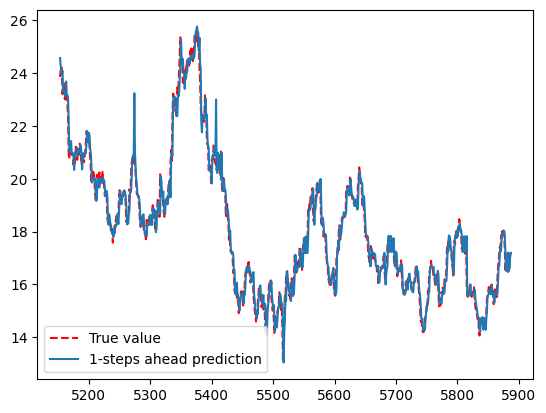

In [ ]:
#Results - plot
rf_rmse, currentval_rmse, model_rf = time_series_valid_test(X, y, 3, "test", optimal_par)

In [ ]:
#Results - RMSE
print("RMSE of Model 1:", rf_rmse)

print("RMSE of Simple Prediction:", currentval_rmse)

RMSE of Model 1: 5.5797629575790895
RMSE of Simple Prediction: 0.5689821043887909


In [ ]:
#Understand what feature influence the model the most
print("Importance of feature variables:", model_rf.feature_importances_)

Importance of feature variables: [1.97475574e-04 2.62029294e-04 2.86694675e-04 1.32956835e-03
 9.97043800e-01 1.11238149e-04 9.62619511e-05 9.00488170e-05
 1.00060552e-04 1.04610069e-04 8.57679863e-05 7.00292684e-05
 6.12329331e-05 7.17814793e-05 8.94013146e-05]


**Method 2 - No GOLD**

Since Model 1 shows that $GOLD_t$ has a very significant effect on gold price prediction, we wanted to check if other feature variables could achieve similar performance. Therefore, we removed $GOLD_t$ and keep DX-Y.NYB and PL=F as the feature variables. We aimed to see if we could predict gold prices using other variables without knowing the previous gold price. As shown in the results below, the prediction does not perform well at all.

In [ ]:
#Pick feature variables
import numpy as np
n=len(data['GOLD'])
x=[]
y=[]
for i in range(n-5):
  x.append(list(data['DX-Y.NYB'].iloc[i:i+5])+
           list(data['PL=F'].iloc[i:i+5]))
  y.append(data['GOLD'].iloc[i+5])
X=np.array(x)
y=np.array(y)
print(X[0:2])
print(y[0:2])

[[114.7300034 113.7099991 114.4700012 113.3099976 113.5400009 612.
  622.0999756 607.4000244 605.4000244 612.5999756]
 [113.7099991 114.4700012 113.3099976 113.5400009 114.0500031 622.0999756
  607.4000244 605.4000244 612.5999756 607.9000244]]
[16.31999969 15.80000019]


In [ ]:
#Pick the best hyperparameters
rf_rmse = time_series_valid_test(X, y, 3, "valid")
print(rf_rmse)
ind = 0
for ccp_alpha in ccp_alpha_list:
        for n_estimators in n_estimators_list:
            if ind == np.argmin(rf_rmse):
                optimal_par = [ccp_alpha, n_estimators]
                print(["(ccp_alpha, n_estimators):",[ccp_alpha, n_estimators]])
                print(rf_rmse[ind])
            ind += 1

[11.49580791 11.505544   11.50250602 11.68453972 11.68584239 11.68762181
 11.67389023 11.67652124 11.67514151 11.67350061 11.67649349 11.67488969]
['(ccp_alpha, n_estimators):', [0.1, 200]]
11.495807910326471


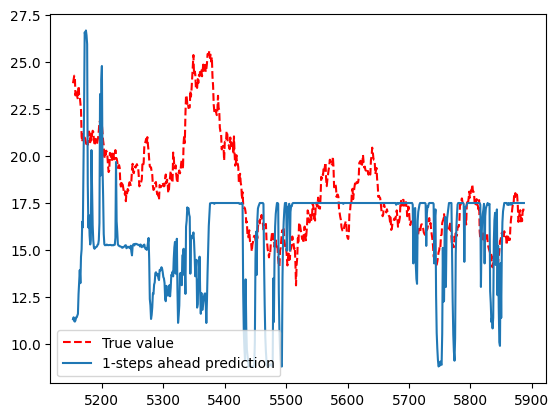

In [ ]:
#Results - plot
rf_rmse, currentval_rmse, model_rf = time_series_valid_test(X, y, 3, "test", optimal_par)

In [ ]:
#Results - RMSE
print("RMSE of Model 2:", rf_rmse)

print("RMSE of Simple Prediction:", currentval_rmse)

RMSE of Model 2: 10.409573624139897
RMSE of Simple Prediction: 0.5689821043887909


In [ ]:
#Understand what feature influence the model the most
print("Importance of feature variables:", model_rf.feature_importances_)

Importance of feature variables: [0.02988506 0.02787451 0.02307468 0.05787958 0.17507695 0.03710006
 0.04008604 0.05552102 0.14494533 0.40855677]


**Method 3 - only GOLD**

Since the simple prediction yielded better results than the models above, we decided to see if the random forest model using only $GOLD_t$ as the feature variable could outperform the simple prediction. The results show that the random forest regressor is not suitable for gold price prediction, as it has a much larger RMSE than the simple prediction, even when using the same feature variable.

In [ ]:
#Pick only the previous gold price as variable
import numpy as np
n=len(data['GOLD'])
x=[]
y=[]
for i in range(n-5):
  x.append(list(data['GOLD'].iloc[i:i+1]))
  y.append(data['GOLD'].iloc[i+1])
X=np.array(x)
y=np.array(y)
print(X[0:2])
print(y[0:2])

[[15.3125    ]
 [15.68999958]]
[15.68999958 14.90999985]


In [ ]:
#Pick the best hyperparameters
rf_rmse = time_series_valid_test(X, y, 3, "valid")
print(rf_rmse)
ind = 0
for ccp_alpha in ccp_alpha_list:
        for n_estimators in n_estimators_list:
            if ind == np.argmin(rf_rmse):
                optimal_par = [ccp_alpha, n_estimators]
                print(["(ccp_alpha, n_estimators):",[ccp_alpha, n_estimators]])
                print(rf_rmse[ind])
            ind += 1

[3.24312699 3.23716537 3.24025755 2.61517558 2.61802883 2.61716214
 2.64962573 2.65234225 2.65203666 2.65005967 2.6526911  2.65228024]
['(ccp_alpha, n_estimators):', [0.001, 200]]
2.61517558353895


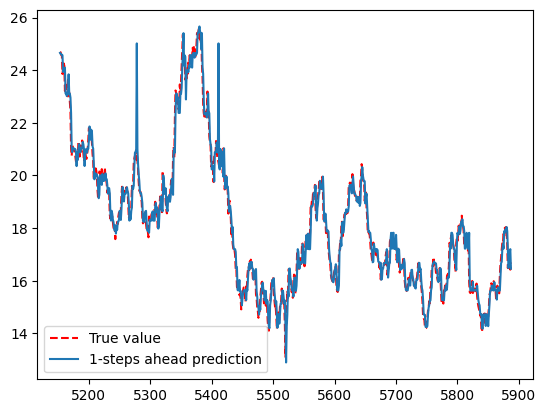

In [ ]:
#Results - plot
rf_rmse, currentval_rmse, model_rf = time_series_valid_test(X, y, 3, "test", optimal_par)

In [ ]:
#Results - RMSE
print("RMSE of Model 3:", rf_rmse)
print("RMSE of Simple Prediction:", currentval_rmse)

RMSE of Model 3: 5.015160989141218
RMSE of Simple Prediction: 0.5686629846293454


**Regressors - Linear Regressor**


In this part, we use the linear regressor to evaluate if the model provides better predictions than a simple prediction method. On the test set, we compute the RMSE of a model that predicts the 1-step ahead value of
$GOLD _{t+1}$ as the current value $GOLD _t$, and compare this to the linear regression model.

**Method 4 - Linear Model**

The models above suggest that simple prediction is more effective. Therefore, we considered using a linear regression model to see if it might perform better. As shown in the results below, the linear regression model performs better than the simple prediction, as it has a lower RMSE.

In [ ]:
#Oranganize feature and target data
import numpy as np
n=len(data['GOLD'])
x=[]
y=[]
for i in range(n-5):
  x.append(list(data['GOLD'].iloc[i:i+5]))
  y.append(data['GOLD'].iloc[i+5])
X=np.array(x)
y=np.array(y)
print(X[0:2])
print(y[0:2])

[[15.3125     15.68999958 14.90999985 15.84000015 16.26000023]
 [15.68999958 14.90999985 15.84000015 16.26000023 16.31999969]]
[16.31999969 15.80000019]


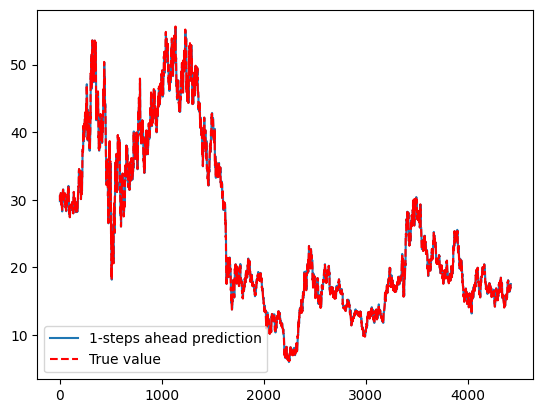

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X[0:1472], y[0:1472])
pred=reg.predict(X[1472:])
plt.plot(pred, label="1-steps ahead prediction")
plt.plot(y[1472:], "r--", label="True value")
plt.legend(loc="lower left")


In [ ]:
#Results - RMSE
print("RMSE of Model 4:", mean_squared_error(pred, y[1472:]))

print("RMSE of Simple Prediction:", currentval_rmse)

RMSE of Model 4: 0.530480346146961
RMSE of Simple Prediction: 0.5689821043887909


**Summary - Regressors**

These models aimed to predict gold prices using regressors. We began by testing correlations to select features, identifying DX-Y.NYB and PL=F as initially promising variables. Despite tuning a random forest regressor, its RMSE was significantly higher than that of a simple prediction method, highlighting the superior effectiveness of the simpler approach and the strong influence of $GOLD _t$ on future prices. Further exploration revealed that without $GOLD _t$, predictions performed poorly, and even a random forest model using only $GOLD _t$ failed to outperform the simple method. Ultimately, a linear regression model provided the best results, achieving a lower RMSE than the simple prediction, demonstrating its better capability in forecasting gold prices amoung the regressors.

## **Neural Networks (Eric Lee)**

**Long Short Term Memory (LSTM)**

In this section, I create a deep Neural Network model using LSTM cells. The characteristics of LSTM cells make them particularly effective for time series prediction, as they carry significant older information to the next cell, addressing the limitations of simple RNN models.

In this project, gold price prediction is treated as a time series problem. The LSTM structure is likely to be a good fit for this task. For my Neural Network model, I will use the following structure:

* LSTM layer with 100 units and return_sequences=True
* Dropout layer with a rate of 0.2
* Another LSTM layer with 100 units and return_sequences=True
* Dropout layer with a rate of 0.2
* A final LSTM layer with 100 units
* Dropout layer with a rate of 0.2
* Dense layer with 50 units
* Dense output layer with 1 unit


Additionally, I want to evaluate how this Neural Network model performs with different types of input datasets: one with all variables, one without the gold price variable, and one with only the gold price variable. Generally, I split the input data into 80% training, 10% validation, and 10% test sets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.backend import clear_session
from keras.callbacks import EarlyStopping
from tensorflow.random import set_seed
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [ ]:
data = pd.read_csv("temp.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', ascending=True, inplace=True)
data.set_index('Date', inplace=True)
data

,GOLD,^GSPC,^DJI,^VIX,^FTSE,000001.SS,^N225,DX-Y.NYB,SI=F,PL=F,CL=F,^TNX
Date,,,,,,,,,,,,
2000-12-01,15.312500,1315.229980,10373.540039,27.480000,6170.399902,2081.843018,14835.330078,114.730003,4.640000,612.000000,32.049999,5.513
2000-12-04,15.690000,1324.969971,10560.950195,27.780001,6158.700195,2092.138916,14954.730469,113.709999,4.714000,622.099976,31.299999,5.522
2000-12-05,14.910000,1376.540039,10898.719727,24.990000,6299.000000,2091.669922,14695.049805,114.470001,4.704000,607.400024,29.549999,5.430
2000-12-06,15.840000,1351.459961,10664.379883,25.070000,6273.299805,2075.626953,14889.370117,113.309998,4.754000,605.400024,29.850000,5.319
2000-12-07,16.260000,1343.550049,10617.360352,25.340000,6231.399902,2075.043945,14720.360352,113.540001,4.724000,612.599976,29.360001,5.299
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13,16.940001,5221.419922,39431.511719,13.600000,8415.000000,3148.020996,38179.460938,105.220001,28.221001,1005.299988,79.120003,4.481
2024-05-14,17.150000,5246.680176,39558.109375,13.420000,8428.099609,3145.773926,38356.058594,105.010002,28.485001,1039.300049,78.019997,4.445
2024-05-15,17.420000,5308.149902,39908.000000,12.450000,8445.799805,3119.902100,38385.730469,104.349998,29.514000,1063.300049,78.629997,4.356


In [ ]:
def train_lstm_model(X_train, y_train, X_validation, y_validation, time_step):
  model = Sequential()
  model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(LSTM(100, return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(100))
  model.add(Dropout(0.2))
  model.add(Dense(50))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model

  # early_stop = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.01, restore_best_weights=True)
  # early_stop = EarlyStopping(patience=10,min_delta=0.01, restore_best_weights=True, monitor="val_last_time_step_mse", mode="min")

  run = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation), verbose=1)

  # model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stop])

  # Make predictions
  train_predict = model.predict(X_train)
  validation_predict = model.predict(X_validation)
  test_predict = model.predict(X_test)

  # Reshape the predictions to be 2D arrays for inverse transformation
  train_predict = train_predict.reshape(-1, 1)
  validation_predict = validation_predict.reshape(-1, 1)
  test_predict = test_predict.reshape(-1, 1)

  # Create an empty array for inverse transformation
  train_predict_full = np.zeros((train_predict.shape[0], scaled_data.shape[1]))
  validation_predict_full = np.zeros((validation_predict.shape[0], scaled_data.shape[1]))
  test_predict_full = np.zeros((test_predict.shape[0], scaled_data.shape[1]))

  # Insert the predictions into the appropriate column
  train_predict_full[:, gold_index] = train_predict.flatten()
  validation_predict_full[:, gold_index] = validation_predict.flatten()
  test_predict_full[:, gold_index] = test_predict.flatten()

  # Inverse transform the predictions
  train_predict = scaler.inverse_transform(train_predict_full)[:, gold_index]
  validation_predict = scaler.inverse_transform(validation_predict_full)[:, gold_index]
  test_predict = scaler.inverse_transform(test_predict_full)[:, gold_index]

  # Inverse transform the actual target values for comparison
  y_train_actual = scaler.inverse_transform(np.concatenate((np.zeros((y_train.shape[0], gold_index)), y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_data.shape[1] - gold_index - 1))), axis=1))[:, gold_index]
  y_validation_actual = scaler.inverse_transform(np.concatenate((np.zeros((y_validation.shape[0], gold_index)), y_validation.reshape(-1, 1), np.zeros((y_validation.shape[0], scaled_data.shape[1] - gold_index - 1))), axis=1))[:, gold_index]
  y_test_actual = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], gold_index)), y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - gold_index - 1))), axis=1))[:, gold_index]
  return train_predict, validation_predict, test_predict, y_train_actual, y_validation_actual, y_test_actual, run

def plot_predictions(y_actual, y_pred, title):
    plt.figure(figsize=(14, 7))
    plt.plot(y_actual, color='blue', label='Actual Gold Price')
    plt.plot(y_pred, color='red', linestyle='--', label='Predicted Gold Price')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Gold Price')
    plt.legend()
    plt.show()

def show_results(train_predict, y_train_actual, validation_predict, y_validation_actual, test_predict, y_test_actual, history, zoom):
    # Plot the training predictions
    plot_predictions(y_train_actual, train_predict, 'Training Set: Actual vs Predicted Gold Price')

    # Plot the validation predictions
    plot_predictions(y_validation_actual, validation_predict, 'Validation Set: Actual vs Predicted Gold Price')

    # Plot the test predictions
    plot_predictions(y_test_actual, test_predict, 'Test Set: Actual vs Predicted Gold Price')

    # Plot the training and validation loss
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, zoom)  # Adjust the y-axis limit to zoom in
    plt.title('Training and Validation Loss')
    plt.show()

    print("RMSE of Model:", np.sqrt(mean_squared_error(y_test_actual, test_predict)))
    MAPE = mean_absolute_percentage_error(y_test_actual, test_predict)

    Accuracy = 1 - MAPE
    print("Accuracy:", Accuracy)

def reset_session(seed=42):
    set_seed(seed)
    np.random.seed(seed)
    clear_session()


**Method 1 - All Variables**

 using all variables as input data

In [ ]:
reset_session()
gold_index = data.columns.get_loc("GOLD")
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the train, validation, and test size
train_size = int(len(scaled_data) * 0.8)
validation_size = int(len(scaled_data) * 0.1)
test_size = len(scaled_data) - train_size - validation_size

# Split the data
train_data = scaled_data[:train_size]
validation_data = scaled_data[train_size:train_size + validation_size]
test_data = scaled_data[train_size + validation_size:]

# Create a function to prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        y.append(data[i + time_step, gold_index])
    return np.array(X), np.array(y)

time_step = 60  # you can choose any time step

# Create datasets
X_train, y_train = create_dataset(train_data, time_step)
X_validation, y_validation = create_dataset(validation_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (4659, 60, 12), y_train shape: (4659,)
X_validation shape: (529, 60, 12), y_validation shape: (529,)
X_test shape: (530, 60, 12), y_test shape: (530,)


In [ ]:
# Train the model
train_predict, validation_predict, test_predict, y_train_actual, y_validation_actual, y_test_actual, run = train_lstm_model(X_train, y_train, X_validation, y_validation, time_step)

Epoch 1/150
146/146 [==============================] - 7s 18ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 2/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 3/150
146/146 [==============================] - 2s 15ms/step - loss: 0.0024 - val_loss: 0.0057
Epoch 4/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0023 - val_loss: 0.0068
Epoch 5/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 6/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 7/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 8/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 9/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 10/150
146/146 [==============================] - 2s 14ms/step - loss: 0.001

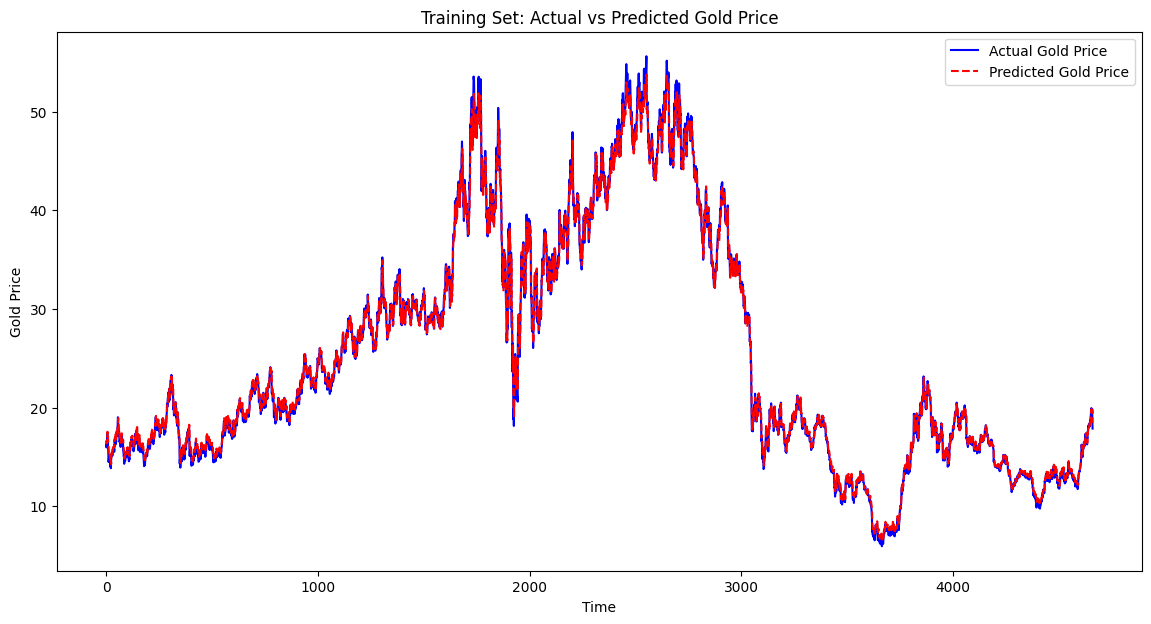

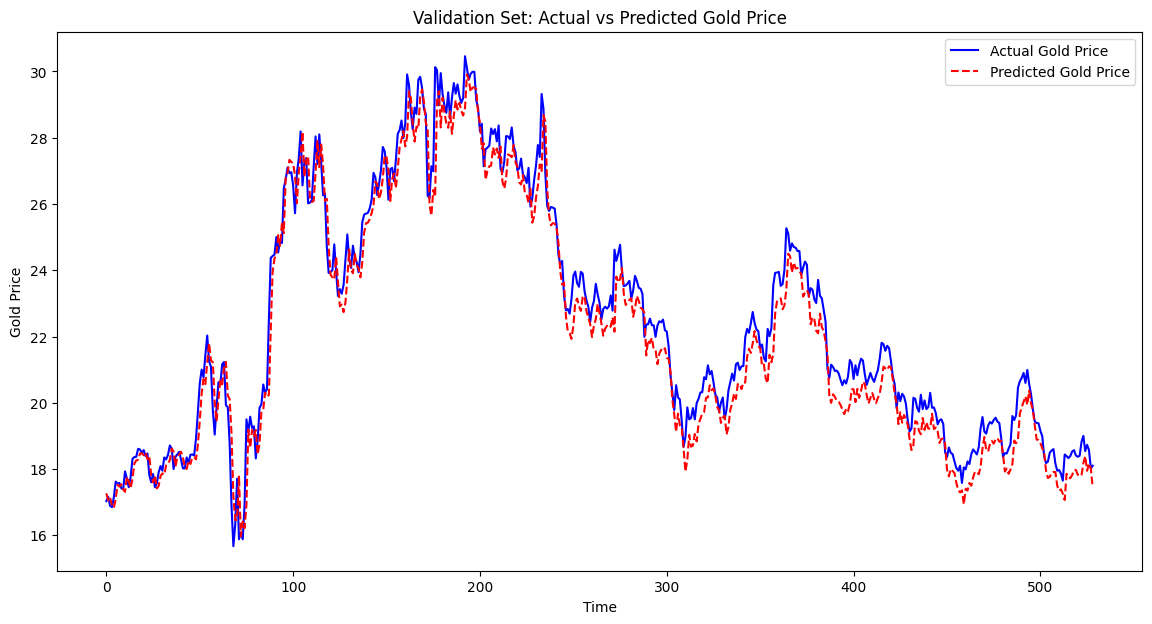

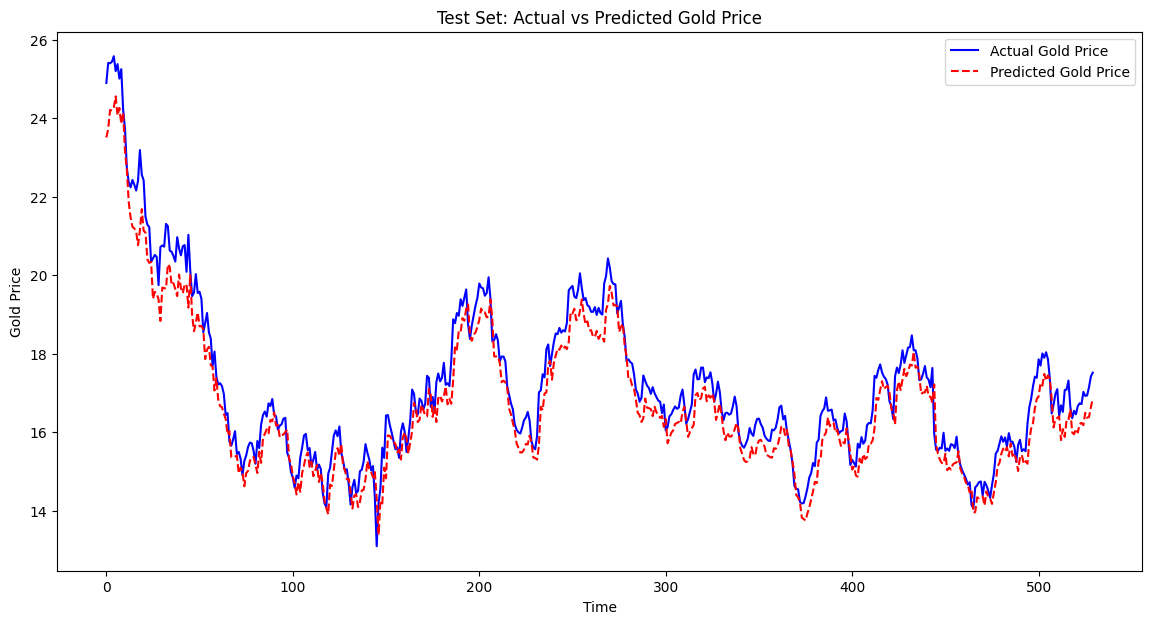

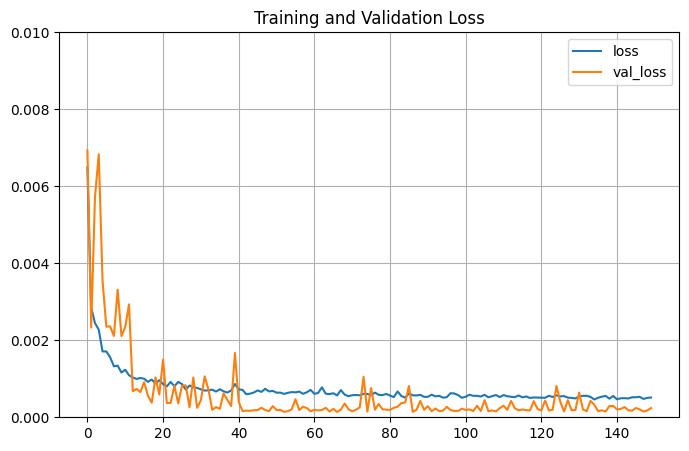

RMSE of Model: 0.6200280078746165
Accuracy: 0.9708391645684088


In [ ]:
# Plot the training predictions
show_results(train_predict, y_train_actual, validation_predict, y_validation_actual, test_predict, y_test_actual, run, 0.01)

**Method 2 - No GOLD**

uisng simply other variables but without gold price as input data

In [ ]:
reset_session()
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the train, validation, and test size
train_size = int(len(scaled_data) * 0.8)
validation_size = int(len(scaled_data) * 0.1)
test_size = len(scaled_data) - train_size - validation_size

# Split the data
train_data = scaled_data[:train_size]
validation_data = scaled_data[train_size:train_size + validation_size]
test_data = scaled_data[train_size + validation_size:]

# Separate the target variable (gold price) from the features
gold_index = data.columns.get_loc("GOLD")
X_train_data = np.delete(train_data, gold_index, axis=1)
y_train_data = train_data[:, gold_index]

X_validation_data = np.delete(validation_data, gold_index, axis=1)
y_validation_data = validation_data[:, gold_index]

X_test_data = np.delete(test_data, gold_index, axis=1)
y_test_data = test_data[:, gold_index]

# Create a function to prepare the dataset for LSTM
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        v = X[i:(i + time_step), :]
        Xs.append(v)
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 60 # you can choose any time step

# Create datasets
X_train, y_train = create_dataset(X_train_data, y_train_data, time_step)
X_validation, y_validation = create_dataset(X_validation_data, y_validation_data, time_step)
X_test, y_test = create_dataset(X_test_data, y_test_data, time_step)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (4659, 60, 11), y_train shape: (4659,)
X_validation shape: (529, 60, 11), y_validation shape: (529,)
X_test shape: (530, 60, 11), y_test shape: (530,)


In [ ]:
# Train the model
train_predict, validation_predict, test_predict, y_train_actual, y_validation_actual, y_test_actual, run = train_lstm_model(X_train, y_train, X_validation, y_validation, time_step)

Epoch 1/150
146/146 [==============================] - 8s 21ms/step - loss: 0.0131 - val_loss: 0.0417
Epoch 2/150
146/146 [==============================] - 3s 17ms/step - loss: 0.0054 - val_loss: 0.0587
Epoch 3/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0038 - val_loss: 0.0384
Epoch 4/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0034 - val_loss: 0.0373
Epoch 5/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0031 - val_loss: 0.0521
Epoch 6/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0030 - val_loss: 0.0290
Epoch 7/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0026 - val_loss: 0.0213
Epoch 8/150
146/146 [==============================] - 2s 13ms/step - loss: 0.0025 - val_loss: 0.0204
Epoch 9/150
146/146 [==============================] - 2s 17ms/step - loss: 0.0024 - val_loss: 0.0197
Epoch 10/150
146/146 [==============================] - 2s 12ms/step - loss: 0.002

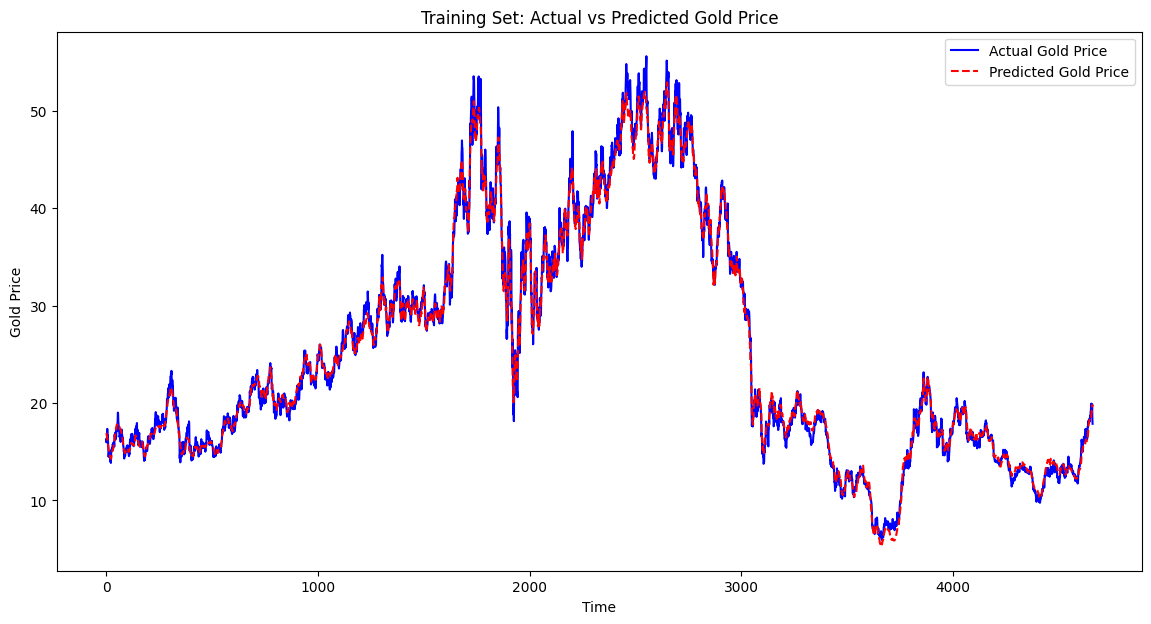

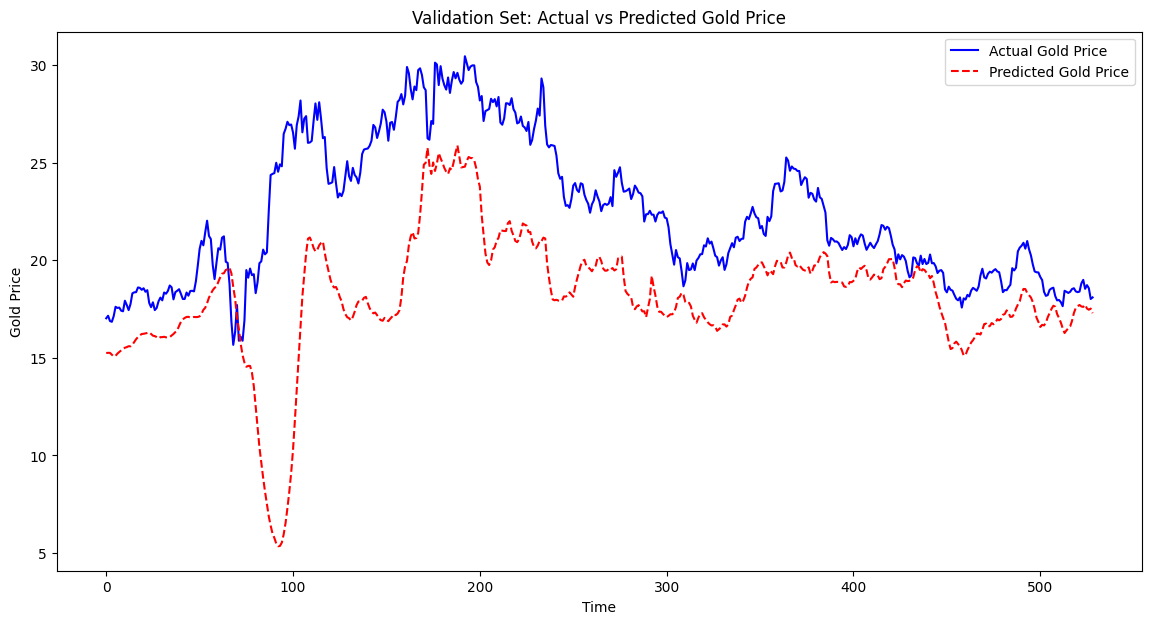

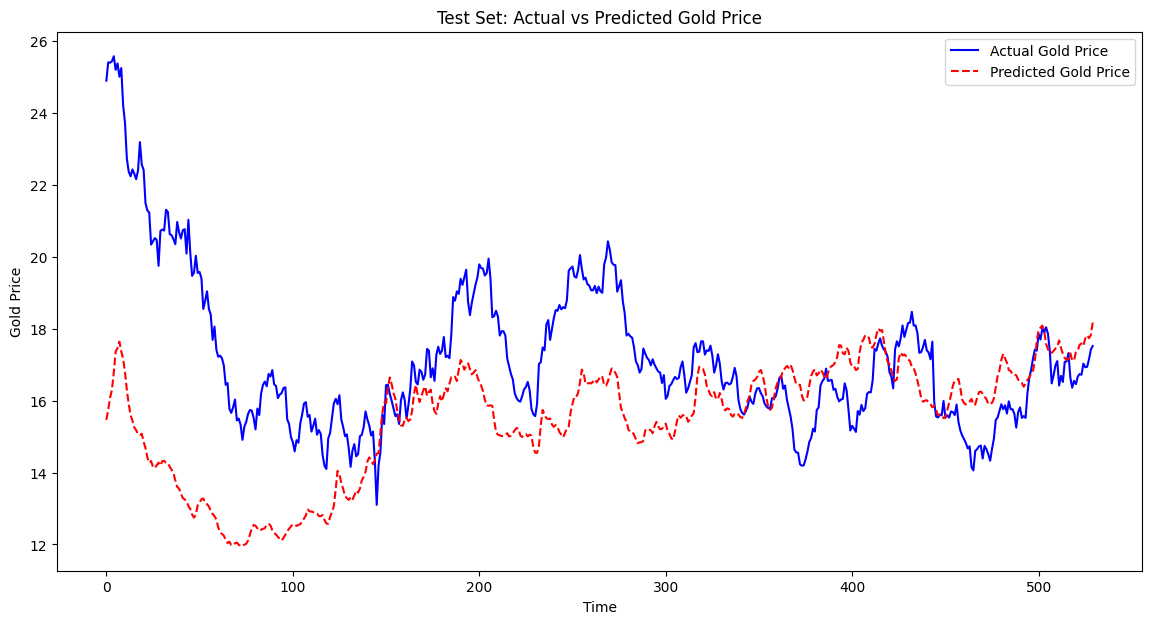

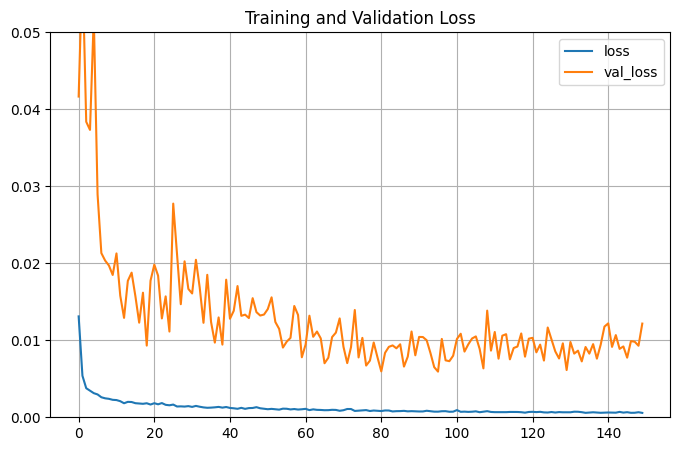

RMSE of Model: 2.993252445473248
Accuracy: 0.8790734335920092


In [ ]:
# Plot the training predictions
show_results(train_predict, y_train_actual, validation_predict, y_validation_actual, test_predict, y_test_actual, run, 0.05)

**Method 3 - Only GOLD**

uisng simply gold price but without other variables as input data

In [ ]:
reset_session()
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the train, validation, and test size
train_size = int(len(scaled_data) * 0.8)
validation_size = int(len(scaled_data) * 0.1)
test_size = len(scaled_data) - train_size - validation_size

# Split the data
train_data = scaled_data[:train_size]
validation_data = scaled_data[train_size:train_size + validation_size]
test_data = scaled_data[train_size + validation_size:]

# Create a function to prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]  # Only gold price
        X.append(a)
        y.append(data[i + time_step, 0])  # Predict the future gold price
    return np.array(X), np.array(y)

time_step = 60  # you can choose any time step

# Create datasets
X_train, y_train = create_dataset(train_data, time_step)
X_validation, y_validation = create_dataset(validation_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (4659, 60, 1), y_train shape: (4659,)
X_validation shape: (529, 60, 1), y_validation shape: (529,)
X_test shape: (530, 60, 1), y_test shape: (530,)


In [ ]:
# Train the model
train_predict, validation_predict, test_predict, y_train_actual, y_validation_actual, y_test_actual, run = train_lstm_model(X_train, y_train, X_validation, y_validation, time_step)

Epoch 1/150
146/146 [==============================] - 8s 18ms/step - loss: 0.0063 - val_loss: 0.0011
Epoch 2/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0021 - val_loss: 7.7744e-04
Epoch 3/150
146/146 [==============================] - 2s 15ms/step - loss: 0.0019 - val_loss: 5.4283e-04
Epoch 4/150
146/146 [==============================] - 2s 13ms/step - loss: 0.0016 - val_loss: 4.7910e-04
Epoch 5/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0014 - val_loss: 4.1311e-04
Epoch 6/150
146/146 [==============================] - 2s 11ms/step - loss: 0.0012 - val_loss: 5.1625e-04
Epoch 7/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0011 - val_loss: 5.0285e-04
Epoch 8/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0010 - val_loss: 4.7939e-04
Epoch 9/150
146/146 [==============================] - 2s 12ms/step - loss: 0.0010 - val_loss: 3.4634e-04
Epoch 10/150
146/146 [============================

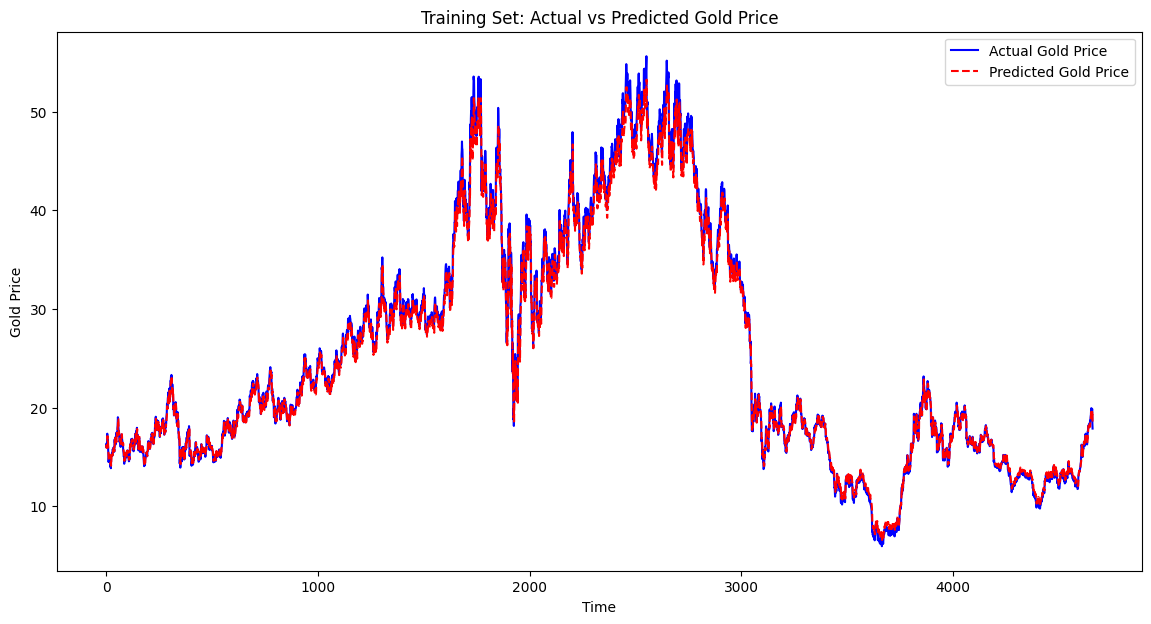

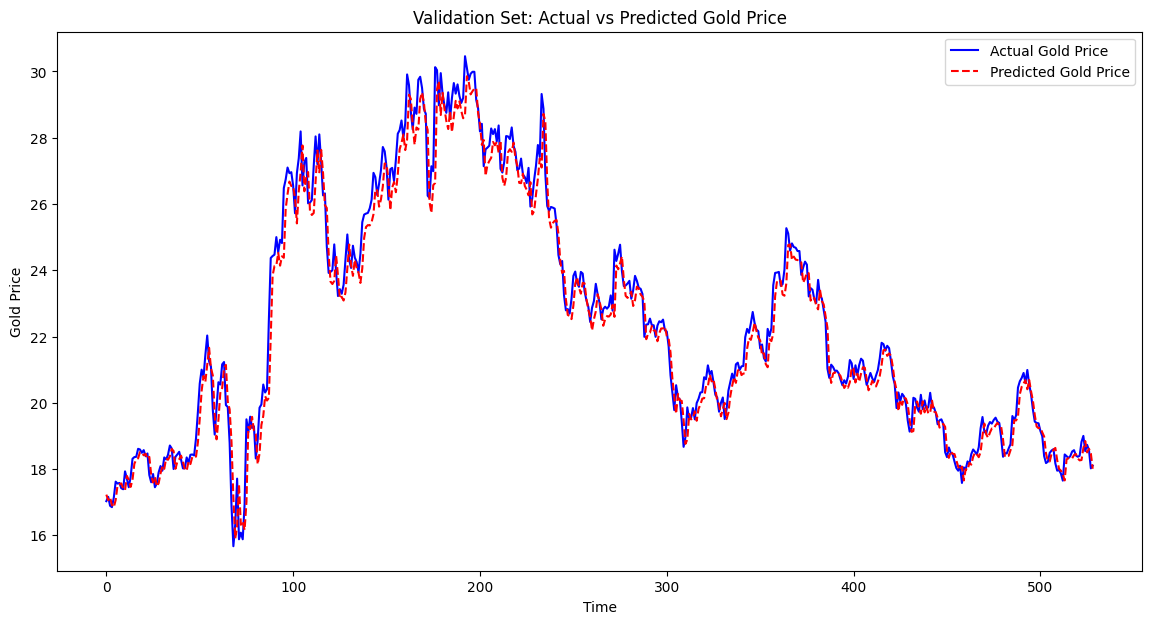

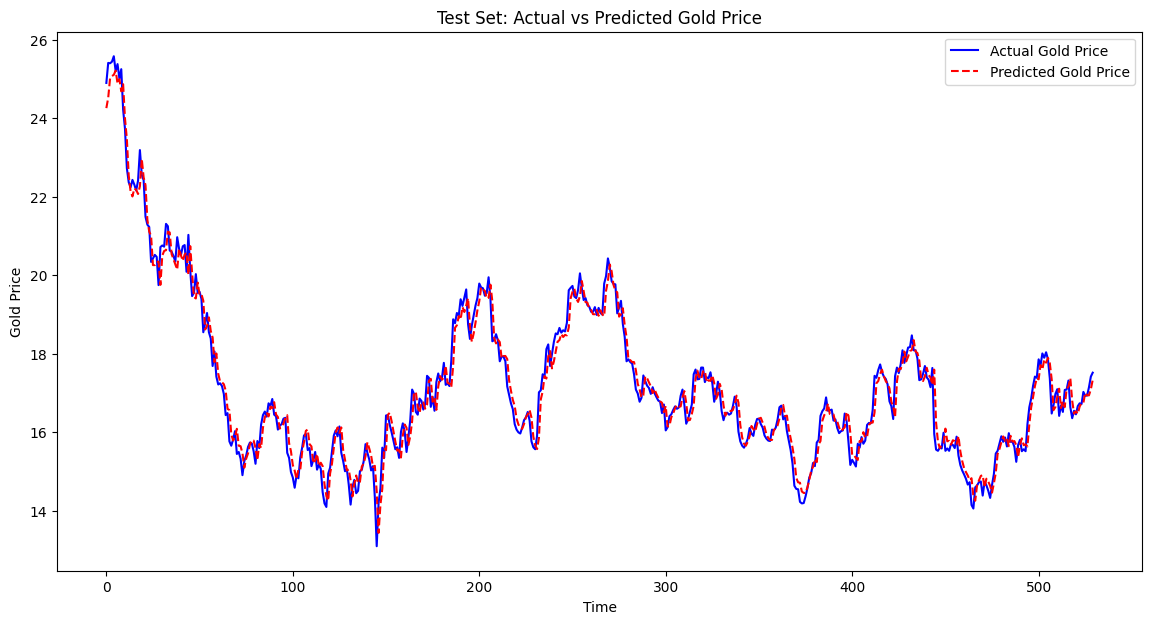

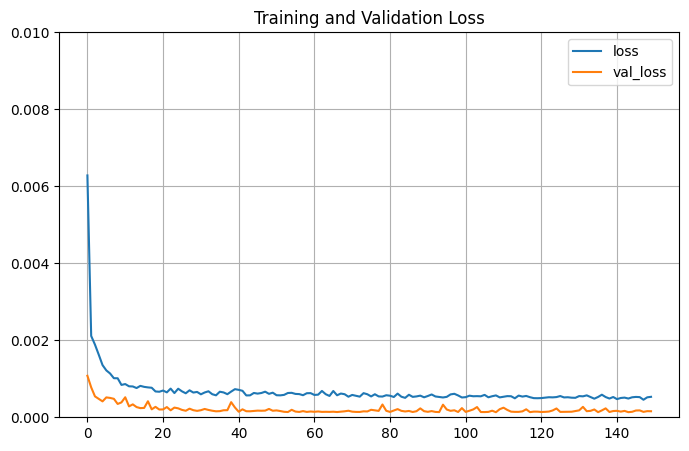

RMSE of Model: 0.36847706573055033
Accuracy: 0.9836855437365676


In [ ]:
# Plot the training predictions
show_results(train_predict, y_train_actual, validation_predict, y_validation_actual, test_predict, y_test_actual, run, 0.01)

**Summary - LSTM**

Based on the results and plots above, we can conclude that the dataset containing only gold prices (method 3) performs the best under this neural network. Its predictions are the closest to the real-world prices, and its learning curve is the most effective among the three methods. The dataset with all variables (method 1) shows similar prediction accuracy to the method 3 dataset, but its learning curve is more erratic compared to method 3. On the other hand, the dataset without gold prices (method 2) shows a significant difference compared to the other two datasets. Although its accuracy is close to 90%, there is a large gap between its predictions and the real-world prices in the gold price plot. In general, the LSTM model indicates that gold prices heavily rely on their own historical values. Nevertheless, the LSTM model using the dataset that only includes other variables still demonstrates good capability in predicting trends.

## **Conclusion**

In conclusion, this project demonstrated the application of various machine learning techniques to predict gold prices. The analysis included both traditional regression models and advanced neural networks, specifically LSTM models, to capture the complex time series dynamics of gold prices. The performance of the regression models varied significantly, highlighting the importance of model selection and tuning.

Among the regression models, the Random Forest Regressor and Linear Regressor were employed. The Random Forest Regressor, despite its complexity, did not outperform a simple prediction method, indicating that it may not be well-suited for this specific task. The Linear Regressor, on the other hand, showed better performance, achieving a lower RMSE compared to the simple prediction method, suggesting it can capture some underlying trends in the data.

The LSTM model showed promise in leveraging historical data to improve prediction accuracy. The evaluation across different datasets and model structures highlighted the importance of feature selection and model tuning. Despite the challenges, the results underscore the potential of machine learning in financial forecasting, offering valuable insights for future research and practical applications in trading strategies and risk management. The comparison of model performance emphasizes that while neural networks like LSTM can provide advanced capabilities, simpler models can also be effective with the right features and tuning.